                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None
spam
0    4360
1    1368
Name: count, dtype: int64


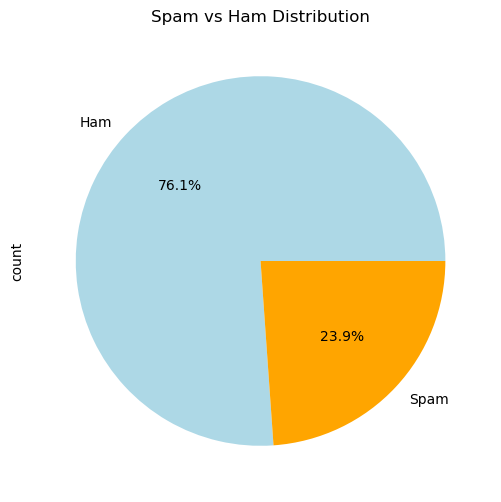

Training Data: (4582,), Testing Data: (1146,)
Accuracy: 99.30%

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      1.00      1.00       861
        Spam       1.00      0.97      0.99       285

    accuracy                           0.99      1146
   macro avg       1.00      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146


Confusion Matrix:
 [[861   0]
 [  8 277]]



Type a message to check if it's Spam or Ham:  hi, im thalha. just check our product, it woul be helpful for your business. I create professional websites


Result: Spam


In [1]:
import sys
!{sys.executable} -m pip install matplotlib pandas scikit-learn

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress warnings
warnings.filterwarnings('ignore')

# Load dataset
dataset = pd.read_csv('emailspam.csv', encoding='latin-1')

# Display first 5 rows
print(dataset.head())

# Check dataset structure
print(dataset.info())

# Check spam vs ham distribution
print(dataset.spam.value_counts())

# Visualize the spam vs ham distribution
plt.figure(figsize=(6,6))
dataset['spam'].value_counts().plot(kind='pie', labels=['Ham', 'Spam'], autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title("Spam vs Ham Distribution")
plt.show()

# Extract features and labels
X = dataset['text']
y = dataset['spam']

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Print dataset sizes
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

# Convert text into numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Initialize and train SVM model
svm_model = SVC(kernel='linear', random_state=10)
svm_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test_tfidf)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# Display Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Function to classify new email messages
def classify_email(email_text):
    email_transformed = tfidf_transformer.transform(vectorizer.transform([email_text]))
    prediction = svm_model.predict(email_transformed)
    return "Spam" if prediction[0] == 1 else "Ham"

# Get user input and classify
email_input = input("\nType a message to check if it's Spam or Ham: ")
print(f"Result: {classify_email(email_input)}")


